In [9]:
import matplotlib.pyplot as plt

from distributions.sequence import Sequence

from algorithms.full_bandit_exp3 import FullBanditExp3

import numpy as np
import pandas as pd
import seaborn as sns

import pickle
import json

import os

In [10]:
def get_name(run_name):
    return run_name.split("_")[0]

def get_length(run_name):
    return run_name.split("_")[1]

def theoretical_bound(T, sequence: Sequence):
    return 8 * sequence.m * np.sqrt(T * sequence.K * sequence.d * np.log(np.e * sequence.K / sequence.m) * np.log(np.sqrt(T) * sequence.m * sequence.sigma * sequence.R))



In [11]:
sample_sequences = {}
results = {}
distributions = os.listdir(f"output/")
for dist_index, dist in enumerate(distributions):
    results[dist] = {}
    sample_sequences[dist] = {}

    lengths = os.listdir(f"output/{dist}")

    for length_index, length in enumerate(lengths):
        results[dist][length] = {}
        
        with open(f"output/{dist}/{length}/0/sequence.json", "rb") as input_file:
            sample_sequences[dist][length] = pickle.load(input_file)

        algo_names = os.listdir(f"output/{dist}/{length}/0")
        algo_names = np.unique([x.split("_")[0] for x in algo_names])
        algo_names = algo_names[algo_names != "sequence.json"]
        algo_names = algo_names[algo_names != "UniformRandomM=1"]

        for algo_name in algo_names:
            results[dist][length][algo_name] = {
                "regret": [],
                "gamma": [],
                "time_elapsed": [],
            }

            iterations = os.listdir(f"output/{dist}/{length}/")
            for iteration in iterations:
                if int(iteration) >= 10:
                    continue

                with open(f"output/{dist}/{length}/{iteration}/{algo_name}_general_info.json", "r") as input_file:
                    input_dict = json.load(input_file)


                result_buffer = results[dist][length][algo_name]
                result_buffer["regret"].append(input_dict["regret"])
                result_buffer["gamma"].append(input_dict["gamma"])
                result_buffer["time_elapsed"].append(input_dict["time_elapsed"])

for dist_name in results.keys():
    for length in results[dist_name].keys():
        for algo_name in results[dist_name][length].keys():
            for key in results[dist_name][length][algo_name].keys():
                results[dist_name][length][algo_name][key] = np.array(results[dist_name][length][algo_name][key])
print(results[dist_name][length].keys())

dict_keys(['Bubeck', 'Bubeckgamma=0.003162277660168379eta=0.003162277660168379', 'FullBanditExp3Inv', 'FullBanditExp3Invgamma=0.003162277660168379eta=0.003162277660168379', 'FullBanditExp3Invgamma=0.030983866769659328eta=0.0003227486121839514', 'FullBanditExp3Invgamma=0.1eta=0.0001', 'FullBanditExp3Invgamma=0.1eta=1e-05', 'FullBanditExp3Invgamma=0.25eta=0.0001', 'FullBanditExp3Invgamma=0.25eta=1e-05', 'FullBanditNewTuning', 'NonContextualExp3', 'NonContextualExp3gamma=0.003162277660168379eta=0.003162277660168379', 'OnePerContext', 'OnePerContextBubeck', 'OnePerContextBubeckgamma=0.003162277660168379eta=0.003162277660168379', 'OnePerContextCorrectgamma=0.003162277660168379eta=0.003162277660168379', 'OnePerContextSB', 'OnePerContextSBgamma=0.003162277660168379eta=0.003162277660168379', 'OnePerContextSP', 'OnePerContextSPgamma=0.003162277660168379eta=0.003162277660168379', 'OnePerContextgamma=0.003162277660168379eta=0.003162277660168379', 'RealLinExp3', 'RealLinExp3gamma=0.003162277660168

In [12]:
context_mset_dict = {
    3: 1, 
    5: 2,
    12: 3
}

algo_name_dict = {
    "Bubeck": "NC FTRL",
    "OnePerContextBubeck": "NC FTRL OPC",
    "OnePerContextCorrect": "ComBand OPC",
    "OnePerContextSB": "ComBandSB OPC",
    "FullBanditExp3Inv": "EXP3-Tensor",
    "NonContextualExp3": "ComBand",
    "RealLinExp3": "RealLinExp3",
    "SemiBanditFTRLInv": "CO$_2$ FTRL",
    "UniformRandom": "UniformRandom",
    "OnePerContext": "ComBand OPC",
    "FullBanditNewTuning": "EXP3-Tensor",
    "FullBanditExp3Invgamma=0.030983866769659328eta=0.0003227486121839514": "FullBanditKdTuning",
    "OnePerContextSP": "Shortest Path OPC",
    "ShortestPath": "Shortest Path"
}

for gamma in [0.1, 0.25]:
    for eta in [1e-4, 1e-5]:
        adjusted_key = "FullBanditExp3Inv" + f"gamma={gamma}eta={eta}"
        algo_name_dict[adjusted_key] = adjusted_key

for key in list(algo_name_dict.keys()):
    adjusted_key = key + "gamma=0.003162277660168379eta=0.003162277660168379"
    algo_name_dict[adjusted_key] = algo_name_dict[key] + ""

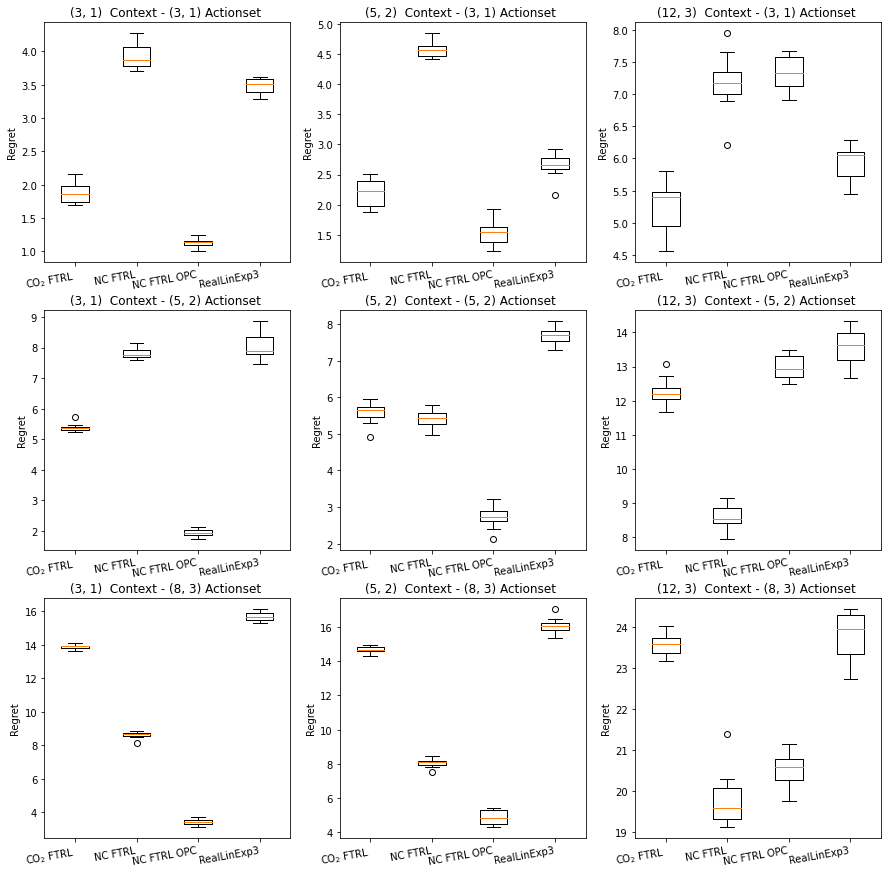

In [13]:
import matplotlib.pyplot as plt

fontsize = 10
figsize = 15

algo_name_list = results[dist_name][length]
#algo_name_list = ["FullBanditExp3Inv", "RealLinExp3", "SemiBanditFTRLInv", "NonContextualExp3", "OnePerContext"]
#algo_name_list = ["FullBanditExp3Invgamma=0.030983866769659328eta=0.0003227486121839514", "FullBanditNewTuning", "FullBanditExp3Inv", "RealLinExp3", "NonContextualExp3", "OnePerContext"]
# algo_name_list = ["OnePerContextSP", "ShortestPath", "FullBanditExp3Inv", "RealLinExp3", "SemiBanditFTRLInv", "NonContextualExp3", "OnePerContext", "UniformRandom"]
algo_name_list = ["SemiBanditFTRLInv", "Bubeck", "OnePerContextBubeck", "RealLinExp3"]
# for gamma in [0.1, 0.25]:
#     for eta in [1e-4, 1e-5]:
#         algo_name_list.append("FullBanditExp3Inv" + f"gamma={gamma}eta={eta}")

number_of_ds = []
number_of_Ks = []
for length in results[dist_name].keys():
    for dist_name in results.keys():
        number_of_ds.append(sample_sequences[dist_name][length].d)
        number_of_Ks.append(sample_sequences[dist_name][length].K)

number_of_ds = np.unique(number_of_ds)
number_of_Ks = np.unique(number_of_Ks)

fig, axs = plt.subplots(len(number_of_Ks), len(number_of_ds), figsize=(figsize, figsize))

for length in results[dist_name].keys():
    for dist_name in results.keys():
        sequence = sample_sequences[dist_name][length]

        full_regret_list = []
        labels = []
        for index, algo_name in enumerate(algo_name_list):
            regret_list = results[dist_name][length][algo_name]["regret"] / 1000
            full_regret_list.append(regret_list)
            labels.append(algo_name_dict[algo_name])

            indcies = (np.where(number_of_Ks == sequence.K)[0][0], np.where(number_of_ds == sequence.d)[0][0])
            axs[indcies].set_title(f"({sequence.d}, {context_mset_dict[sequence.d]})  Context - ({sequence.K}, {sequence.m}) Actionset ")
            axs[indcies].set_ylabel('Regret', fontsize=fontsize)
            #axs[indcies].plot(index, np.mean(regret_list), marker="o", markersize=20, label=algo_name_dict[algo_name])
            #axs[indcies].legend()
        
        axs[indcies].boxplot(full_regret_list, labels=labels)
        plt.setp(axs[indcies].get_xticklabels(), rotation=10, fontsize=fontsize, horizontalalignment='right')
        plt.savefig("Theoretical_TuningSB.pdf", bbox_inches='tight')

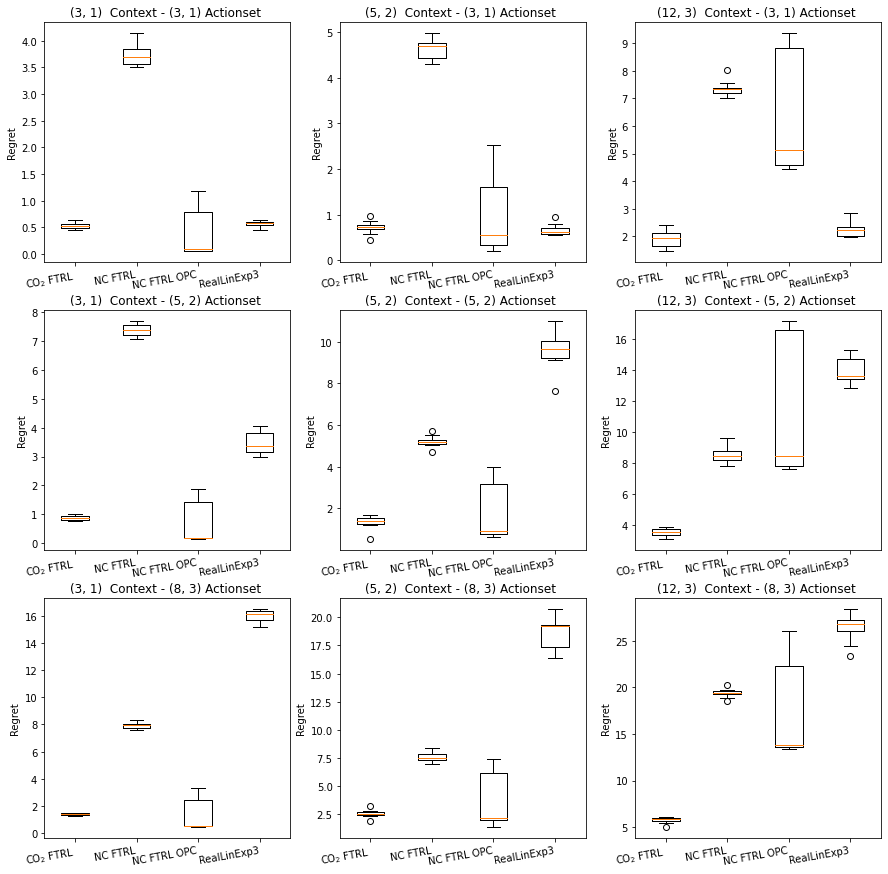

In [14]:
algo_name_list = results[dist_name][length]
# algo_name_list = ["OnePerContextSP", "ShortestPath", "FullBanditExp3Inv", "RealLinExp3", "SemiBanditFTRLInv", "NonContextualExp3", "OnePerContext", "UniformRandom"]
algo_name_list = ["SemiBanditFTRLInv", "Bubeck", "OnePerContextBubeck", "RealLinExp3"]

new_list = []
for key in algo_name_list:
    adjusted_key = key + "gamma=0.003162277660168379eta=0.003162277660168379"
    new_list.append(adjusted_key)
algo_name_list = new_list

for gamma in [0.1, 0.25]:
    for eta in [1e-4, 1e-5]:
        pass
        # algo_name_list.append("FullBanditExp3Inv" + f"gamma={gamma}eta={eta}")


number_of_ds = []
number_of_Ks = []
for length in results[dist_name].keys():
    for dist_name in results.keys():
        number_of_ds.append(sample_sequences[dist_name][length].d)
        number_of_Ks.append(sample_sequences[dist_name][length].K)

number_of_ds = np.unique(number_of_ds)
number_of_Ks = np.unique(number_of_Ks)

fig, axs = plt.subplots(len(number_of_Ks), len(number_of_ds), figsize=(figsize, figsize))

for length in results[dist_name].keys():
    for dist_name in results.keys():
        sequence = sample_sequences[dist_name][length]

        full_regret_list = []
        labels = []
        for index, algo_name in enumerate(algo_name_list):
            regret_list = results[dist_name][length][algo_name]["regret"] / 1000
            full_regret_list.append(regret_list)
            labels.append(algo_name_dict[algo_name])

            indcies = (np.where(number_of_Ks == sequence.K)[0][0], np.where(number_of_ds == sequence.d)[0][0])
            axs[indcies].set_title(f"({sequence.d}, {context_mset_dict[sequence.d]})  Context - ({sequence.K}, {sequence.m}) Actionset ")
            axs[indcies].set_ylabel('Regret', fontsize=fontsize)
            #axs[indcies].plot(index, np.mean(regret_list), marker="o", markersize=20, label=algo_name_dict[algo_name])
            #axs[indcies].legend()
        
        axs[indcies].boxplot(full_regret_list, labels=labels)
        plt.setp(axs[indcies].get_xticklabels(), rotation=10, fontsize=fontsize, horizontalalignment='right')
        plt.savefig("sqrt(T)_TuningSB.pdf", bbox_inches='tight')

In [15]:
#
#
#
#
# FULL BANDIT BELOW
#
#
#
#

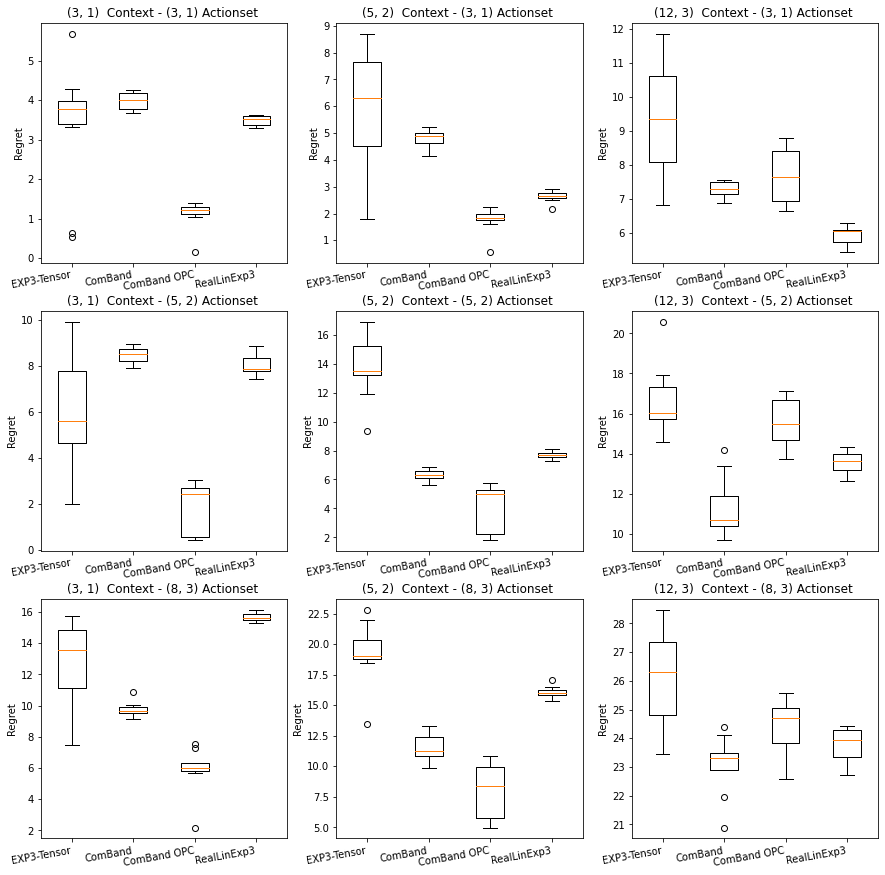

In [16]:
import matplotlib.pyplot as plt

fontsize = 10
figsize = 15

algo_name_list = results[dist_name][length]
#algo_name_list = ["FullBanditExp3Inv", "RealLinExp3", "SemiBanditFTRLInv", "NonContextualExp3", "OnePerContext"]
#algo_name_list = ["FullBanditExp3Invgamma=0.030983866769659328eta=0.0003227486121839514", "FullBanditNewTuning", "FullBanditExp3Inv", "RealLinExp3", "NonContextualExp3", "OnePerContext"]
# algo_name_list = ["OnePerContextSP", "ShortestPath", "FullBanditExp3Inv", "RealLinExp3", "SemiBanditFTRLInv", "NonContextualExp3", "OnePerContext", "UniformRandom"]
algo_name_list = ["FullBanditNewTuning", "NonContextualExp3", "OnePerContext", "RealLinExp3"]
# for gamma in [0.1, 0.25]:
#     for eta in [1e-4, 1e-5]:
#         algo_name_list.append("FullBanditExp3Inv" + f"gamma={gamma}eta={eta}")

number_of_ds = []
number_of_Ks = []
for length in results[dist_name].keys():
    for dist_name in results.keys():
        number_of_ds.append(sample_sequences[dist_name][length].d)
        number_of_Ks.append(sample_sequences[dist_name][length].K)

number_of_ds = np.unique(number_of_ds)
number_of_Ks = np.unique(number_of_Ks)

fig, axs = plt.subplots(len(number_of_Ks), len(number_of_ds), figsize=(figsize, figsize))

for length in results[dist_name].keys():
    for dist_name in results.keys():
        sequence = sample_sequences[dist_name][length]

        full_regret_list = []
        labels = []
        for index, algo_name in enumerate(algo_name_list):
            regret_list = results[dist_name][length][algo_name]["regret"] / 1000
            full_regret_list.append(regret_list)
            labels.append(algo_name_dict[algo_name])

            indcies = (np.where(number_of_Ks == sequence.K)[0][0], np.where(number_of_ds == sequence.d)[0][0])
            axs[indcies].set_title(f"({sequence.d}, {context_mset_dict[sequence.d]})  Context - ({sequence.K}, {sequence.m}) Actionset ")
            axs[indcies].set_ylabel('Regret', fontsize=fontsize)
            #axs[indcies].plot(index, np.mean(regret_list), marker="o", markersize=20, label=algo_name_dict[algo_name])
            #axs[indcies].legend()
        
        axs[indcies].boxplot(full_regret_list, labels=labels)
        plt.setp(axs[indcies].get_xticklabels(), rotation=10, fontsize=fontsize, horizontalalignment='right')
        plt.savefig("Theoretical_TuningFB.pdf", bbox_inches='tight')

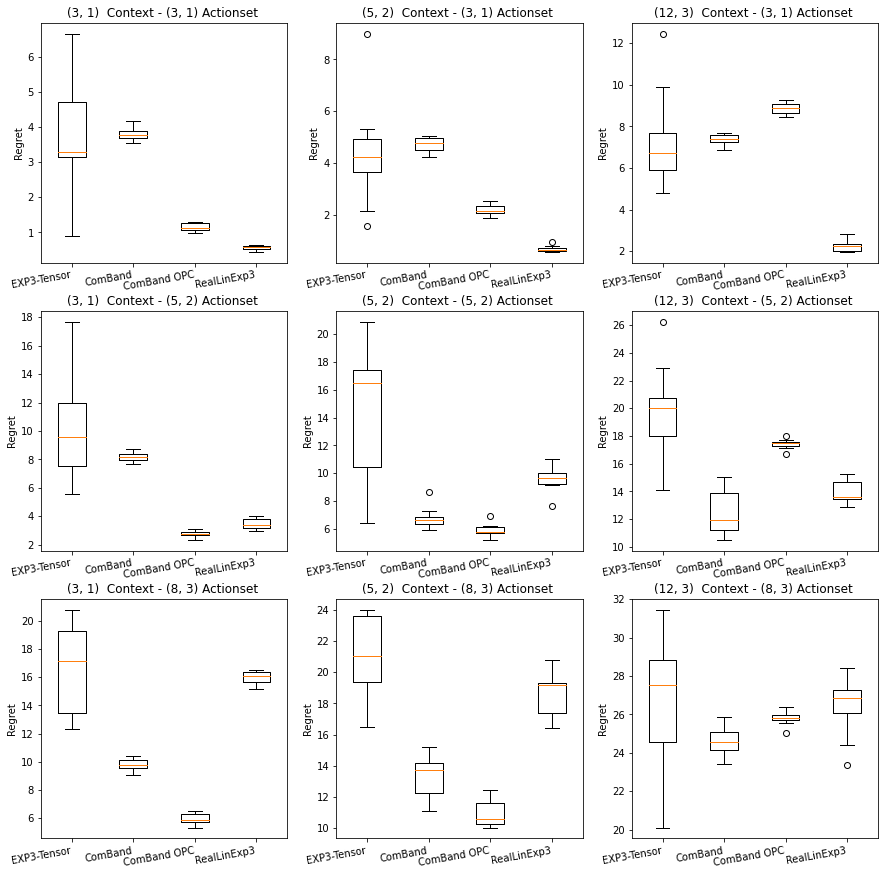

In [17]:
algo_name_list = results[dist_name][length]
# algo_name_list = ["OnePerContextSP", "ShortestPath", "FullBanditExp3Inv", "RealLinExp3", "SemiBanditFTRLInv", "NonContextualExp3", "OnePerContext", "UniformRandom"]
algo_name_list = ["FullBanditExp3Inv", "NonContextualExp3", "OnePerContextCorrect", "RealLinExp3"]

new_list = []
for key in algo_name_list:
    adjusted_key = key + "gamma=0.003162277660168379eta=0.003162277660168379"
    new_list.append(adjusted_key)
algo_name_list = new_list

for gamma in [0.1, 0.25]:
    for eta in [1e-4, 1e-5]:
        pass
        # algo_name_list.append("FullBanditExp3Inv" + f"gamma={gamma}eta={eta}")


number_of_ds = []
number_of_Ks = []
for length in results[dist_name].keys():
    for dist_name in results.keys():
        number_of_ds.append(sample_sequences[dist_name][length].d)
        number_of_Ks.append(sample_sequences[dist_name][length].K)

number_of_ds = np.unique(number_of_ds)
number_of_Ks = np.unique(number_of_Ks)

fig, axs = plt.subplots(len(number_of_Ks), len(number_of_ds), figsize=(figsize, figsize))

for length in results[dist_name].keys():
    for dist_name in results.keys():
        sequence = sample_sequences[dist_name][length]

        full_regret_list = []
        labels = []
        for index, algo_name in enumerate(algo_name_list):
            regret_list = results[dist_name][length][algo_name]["regret"] / 1000
            full_regret_list.append(regret_list)
            labels.append(algo_name_dict[algo_name])

            indcies = (np.where(number_of_Ks == sequence.K)[0][0], np.where(number_of_ds == sequence.d)[0][0])
            axs[indcies].set_title(f"({sequence.d}, {context_mset_dict[sequence.d]})  Context - ({sequence.K}, {sequence.m}) Actionset ")
            axs[indcies].set_ylabel('Regret', fontsize=fontsize)
            #axs[indcies].plot(index, np.mean(regret_list), marker="o", markersize=20, label=algo_name_dict[algo_name])
            #axs[indcies].legend()
        
        axs[indcies].boxplot(full_regret_list, labels=labels)
        plt.setp(axs[indcies].get_xticklabels(), rotation=10, fontsize=fontsize, horizontalalignment='right')
        plt.savefig("sqrt(T)_TuningFB.pdf", bbox_inches='tight')